In [127]:
import pandas as pd
from sqlalchemy import create_engine
import os
import geopandas as gpd
import matplotlib.pyplot as plt

credenciales = dict(
    POSTGRES_DB="db_isa",
    POSTGRES_USER="postgres",
    POSTGRES_PASSWORD="ninguna.123",
    POSTGRES_HOST="extended-case-4.crccn2eby4ve.us-east-2.rds.amazonaws.com",
    POSTGRES_PORT=5432,
)

# Database information from env variables
DATABASES = {
    "db_isa": {
        "NAME": credenciales.get("POSTGRES_DB"),
        "USER": credenciales.get("POSTGRES_USER"),
        "PASSWORD": credenciales.get("POSTGRES_PASSWORD"),
        "HOST": credenciales.get("POSTGRES_HOST"),
        "PORT": credenciales.get("POSTGRES_PORT"),
    },
}

# choose the database to use
db = DATABASES["db_isa"]

# construct an engine connection string
engine_string = (
    "postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}".format(
        user=db["USER"],
        password=db["PASSWORD"],
        host=db["HOST"],
        port=db["PORT"],
        database=db["NAME"],
    )
)

# create sqlalchemy engine
engine = create_engine(engine_string)

table_id = 1
# # read failures table from database into pandas dataframe
# discharges = pd.read_sql_table(f"tbl_discharges_{table_id}", engine)
outages_1 = pd.read_sql_table(f"tbl_outages_1", engine)
outages_2 = pd.read_sql_table(f"tbl_outages_2", engine)
outages_3 = pd.read_sql_table(f"tbl_outages_3", engine)
towers_1= pd.read_sql_table(f"tbl_towers_1", engine)
towers_2= pd.read_sql_table(f"tbl_towers_2", engine)
towers_3= pd.read_sql_table(f"tbl_towers_3", engine)
features= pd.read_sql_table(f"tbl_features", engine)
# outages.iloc[0].astype(str)
# outages.set_index("id_outages", inplace=True)

lineas_dict = {
    "comuneros": "Comuneros Primavera",
    "cerromatoso": "Cerromatoso Primavera",
    "virginia": "La Virginia San Carlos",
}
lineas_dict_numbers = {
    "comuneros": 1,
    "cerromatoso": 2,
    "virginia": 3,
}


def get_discharges(date_first="2018-04-05", num_days=1, table_id=1):
    df = pd.read_sql_query(
        f"""SELECT * FROM tbl_discharges_{table_id}
                        WHERE date BETWEEN ('{date_first}'::date - interval '{num_days} days') AND ('{date_first}'::date + interval '{num_days} days') """,
        engine,
    )
    return df


In [140]:
cols = df_clusters.columns.drop('date_outage')
df_clusters[cols] = df_clusters[cols].apply(pd.to_numeric)

In [142]:
df_clusters.columns

Index(['id_registro', 'time_delta', 'latitude', 'longitude', 'latitude_rad',
       'longitude_rad', 'date', 'polarity', 'magnitude', 'current', 'line',
       'x', 'y', 'lon_failure', 'lat_failure', 'dist_failure_km', 'label',
       'outage', 'cluster', 'date_outage'],
      dtype='object')

In [143]:
df_clusters

,id_registro,time_delta,latitude,longitude,latitude_rad,longitude_rad,date,polarity,magnitude,current,line,x,y,lon_failure,lat_failure,dist_failure_km,label,outage,cluster,date_outage
0,214241,107.141833,7.5948,-75.3106,0.132554,-1.314418,1537024491490000000,-1,18.3,-18.3,2,863918.825410,1.331800e+06,-75.140835,7.661747,19.044965,1.0,121.0,1146.0,2018-09-15 17:02:00
1,213703,1433.064783,8.0262,-75.4509,0.140084,-1.316867,1536944936113000000,1,13.6,13.6,2,848588.399070,1.379570e+06,-75.140835,7.661747,36.118537,0.0,121.0,1134.0,2018-09-15 17:02:00
2,213704,1430.643783,8.0198,-75.4507,0.139972,-1.316863,1536945081373000000,-1,11.1,-11.1,2,848608.083652,1.378862e+06,-75.140835,7.661747,36.045674,0.0,121.0,1134.0,2018-09-15 17:02:00
3,213705,1430.643783,8.0210,-75.4502,0.139993,-1.316854,1536945081373000000,-1,10.2,-10.2,2,848663.661790,1.378995e+06,-75.140835,7.661747,36.001777,0.0,121.0,1134.0,2018-09-15 17:02:00
4,213706,1426.405117,7.9738,-75.3318,0.139169,-1.314788,1536945335693000000,-1,11.9,-11.9,2,861703.213877,1.373732e+06,-75.140835,7.661747,23.091367,0.0,121.0,1134.0,2018-09-15 17:02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,217112,5.226550,7.7798,-75.2863,0.135783,-1.313994,1537030606407000000,1,21.9,21.9,2,866658.669057,1.352257e+06,-75.140835,7.661747,16.581821,1.0,121.0,1146.0,2018-09-15 17:02:00
3416,217113,5.226117,7.7788,-75.2871,0.135766,-1.314008,1537030606433000000,1,10.2,10.2,2,866570.092541,1.352146e+06,-75.140835,7.661747,16.663524,1.0,121.0,1146.0,2018-09-15 17:02:00
3417,217114,5.184717,7.8026,-75.3515,0.136181,-1.315132,1537030608917000000,-1,11.2,-11.2,2,859472.968834,1.354800e+06,-75.140835,7.661747,23.853348,1.0,121.0,1146.0,2018-09-15 17:02:00
3418,217115,5.149783,6.8322,-74.8788,0.119244,-1.306882,1537030611013000000,-1,11.4,-11.4,2,911426.975391,1.247343e+06,-75.140835,7.661747,37.808489,0.0,121.0,1149.0,2018-09-15 17:02:00


In [139]:
date_first = '2018-09-15 17:02:00'
df_clusters = pd.read_sql_query(
        f"""SELECT * FROM tbl_discharges_by_cluster
                        where date BETWEEN ('{date_first}'::timestamp - '24 hours'::interval) AND ('{date_first}'::timestamp - '5 minutes'::interval)""",
        engine,
    )
df_clusters.drop_duplicates(subset=['lon_failure','lat_failure'])

,id_registro,time_delta,latitude,longitude,latitude_rad,longitude_rad,date,polarity,magnitude,current,line,x,y,lon_failure,lat_failure,dist_failure_km,label,outage,cluster,date_outage
0,214241,107.14183333333334,7.594800000000001,-75.3106,0.13255426603046536,-1.3144179316524414,2018-09-15 15:14:51.490,-1,18.3,-18.3,2,863918.8254102615,1331799.8239497086,-75.14083466315006,7.661747277277322,19.044965476085896,1.0,121.0,1146.0,2018-09-15 17:02:00


In [150]:
df_features = pd.read_sql_query(
        f"""SELECT * FROM tbl_features
                        WHERE line = 2 """,
        engine,index_col='id_registro'
    )

In [179]:
df_features.index = pd.to_numeric(df_features.index)
df_features.index.name = 'Cluster'
df_features.join(df_clusters.drop_duplicates('cluster').set_index('cluster')[['date_outage']]).dropna()

,storm_duration,discharges_per_minute,magnitude_mean,magnitude_max,area,discharges_per_sqkm,distance_centroid,distance_polygon,distance_max,line,label,date_outage
Cluster,,,,,,,,,,,,
1134.0,25.576450000000023,0.5473785454979088,17.79285714285714,45.4,93.1132433,0.15035455219719535,12.439319,7.680445486,17.674422569999994,2,0.0,2018-09-15 17:02:00
1135.0,9.455066666666651,0.5288170011140421,18.22,33.1,9.760533059,0.5122671036280745,14.50358449,11.98181356,16.20158485,2,0.0,2018-09-15 17:02:00
1136.0,8.331600000000094,0.8401747563493112,35.08571428571429,93.9,8.959121700999997,0.7813265891028888,5.5144795779999995,3.160907252,7.139417375,2,0.0,2018-09-15 17:02:00
1137.0,5.265599999999949,0.9495594044363508,10.04,18.0,4.680836406,1.0681851631453918,1.855022746,0.7028985708000001,2.764485795,2,0.0,2018-09-15 17:02:00
1138.0,2.912666666666496,1.7166399633784482,8.9,11.0,15.10500426,0.3310161264396757,10.674639140000002,8.090909665000002,12.51617859,2,0.0,2018-09-15 17:02:00
1139.0,6.5364999999999895,1.529870725923662,12.089999999999998,31.6,3.1407891960000005,3.1839131428290863,10.703975859999998,9.534087126000001,11.70996593,2,0.0,2018-09-15 17:02:00
1140.0,4.926999999999964,1.0148163182464047,18.34,28.8,10.1640925,0.4919278332030134,8.277561791,5.76789804,11.65278423,2,0.0,2018-09-15 17:02:00
1141.0,58.05245000000002,1.980967211547488,21.39304347826087,108.1,374.4131797,0.3071473074001941,11.74572266,0.0,24.19259805,2,0.0,2018-09-15 17:02:00
1142.0,74.43345,1.0479159571402374,16.134615384615394,147.3,110.5359842,0.7056525579839185,24.07438966,18.50794091,29.96705543,2,0.0,2018-09-15 17:02:00


In [165]:
df_features.join(df_clusters.set_index('cluster'), lsuffix='_')

,storm_duration,discharges_per_minute,magnitude_mean,magnitude_max,area,discharges_per_sqkm,distance_centroid,distance_polygon,distance_max,line_,...,current,line,x,y,lon_failure,lat_failure,dist_failure_km,label,outage,date_outage
53.0,84.25711666666655,0.7951850555848211,32.53731343283582,108.0,414.83504849999997,0.16150997906822234,22.57360218,14.68781563,29.648126930000004,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
54.0,28.688716666666664,0.6971381896366923,25.3,68.0,176.79239990000002,0.1131270349365284,8.527791606000001,0.0,22.55172327,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
55.0,60.618283333333174,2.7219510505218927,34.03636363636364,158.0,441.0064151,0.3741442172957633,0.5275759092000001,0.0,17.22671194,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
56.0,11.827733333333356,0.42273526626685226,24.0,62.0,56.64517412,0.08826877271853288,26.87530218,22.475369330000003,29.67209565,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
57.0,9.165166666666694,0.5455438162608411,33.0,51.0,42.41426996,0.11788485348717295,17.36249937,9.714889682,23.313661399999997,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202.0,5.9258833333333385,1.181258490295398,41.885714285714286,200.7,24.86455946,0.2815251969881472,12.82198212,9.235011187000001,17.04570345,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1203.0,10.930716666666665,0.7318824779710998,14.3,28.3,3.170264649,2.523448634650564,11.9802927,10.55218142,13.393724059999998,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1204.0,91.26995000000014,1.5777372508695344,8.245833333333332,46.7,371.5355298,0.387580698076214,24.07572776,10.62119482,29.95146805,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1205.0,5.782999999999903,2.0750475531731287,15.666666666666664,67.0,12.14919594,0.9877196860815466,26.29868968,21.24911534,29.75069365,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [110]:
pd.read_sql_table(f"tbl_features", engine)

,id_registro,storm_duration,discharges_per_minute,magnitude_mean,magnitude_max,area,discharges_per_sqkm,distance_centroid,distance_polygon,distance_max,line,label
0,1.0,61.49066666666667,1.0733336224467669,7.280303030303031,21.2,199.7038415,0.3304893862044211,13.568459869999998,7.608621318000001,21.35686314,1,0.0
1,2.0,67.55826666666664,0.65128965219159,6.852272727272728,15.3,179.2071102,0.2455259724399038,12.08768048,5.149274136999999,19.43693902,1,0.0
2,3.0,190.59973333333332,35.047268341753536,12.928772455089836,142.6,4779.753742,1.3975615398974253,3.022396695,0.0,29.990302000000003,1,1.0
3,4.0,14.722216666667011,0.4075473236027541,15.8,29.5,8.412046139000001,0.7132628495917002,18.82723392,11.03558819,24.06048631,1,0.0
4,5.0,140.13056666666648,1.1061112766974244,13.674838709677427,80.5,579.7066292999998,0.2673766214941576,14.26350936,0.1707641197,29.27604997,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3011,3016.0,121.99583333333328,3.762423580040304,15.707625272331144,121.2,1194.713768,0.3841924419841456,5.263543274000001,0.0,26.01532178,3,0.0
3012,3017.0,78.05500000000006,1.6526808019985897,10.994573643410847,36.3,373.68793250000004,0.34520782926272314,5.117170462,0.0,20.61349655,3,0.0
3013,3018.0,6.43954999999994,0.7764517706982703,7.24,14.0,1.295889401,3.85835395840235,26.29029823,25.8145775,26.9434327,3,0.0
3014,3019.0,25.38454999999996,1.3000033484934754,10.124242424242423,38.0,87.65893359999998,0.3764590629243065,23.25376712,16.929363569999996,27.46137714,3,0.0


In [21]:
get_discharges(date_first="2018-04-05  17:34:46.823")

,id_discharges,date,longitude,latitude,polarity,magnitude,current,line
0,2555,2018-04-04 16:15:45.703,-73.8141,6.3493,-1,6.1,-6.1,1
1,2556,2018-04-04 17:29:55.410,-74.2904,6.7582,1,3.3,3.3,1
2,2557,2018-04-04 17:34:46.823,-74.2373,7.1087,-1,23.2,-23.2,1
3,2558,2018-04-04 17:40:21.067,-74.3081,6.8229,-1,5.5,-5.5,1
4,2559,2018-04-04 17:44:52.327,-74.3131,6.7107,1,8.3,8.3,1
...,...,...,...,...,...,...,...,...
1163,3718,2018-04-05 19:47:16.653,-74.2431,6.5128,-1,10.3,-10.3,1
1164,3719,2018-04-05 20:15:27.323,-73.665,6.3683,-1,5.0,-5.0,1
1165,3720,2018-04-05 22:04:50.017,-74.2312,6.4053,-1,10.1,-10.1,1
1166,3721,2018-04-05 23:59:08.597,-74.255,6.8675,1,12.9,12.9,1


In [122]:
def last_24hours(date_first="2018-04-05 22:09:50.017",table_id=1):
    df = pd.read_sql_query(
        f"""SELECT * FROM tbl_discharges_{table_id}
                        WHERE date BETWEEN ('{date_first}'::timestamp - '24 hours'::interval) AND ('{date_first}'::timestamp - '5 minutes'::interval)""",
        engine,
    )
    return df

In [23]:
from datetime import datetime, timedelta
(datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d %H-%M-%S.%f')

'2019-11-15 19-15-59.796183'

In [24]:
datetime.now().strftime('%Y-%m-%d %H-%M-%S.%f')

'2020-11-14 19-15-59.915184'

In [25]:
last_24hours().sort_values('date', ascending= False)

,id_discharges,date,longitude,latitude,polarity,magnitude,current,line
319,3720,2018-04-05 22:04:50.017,-74.2312,6.4053,-1,10.1,-10.1,1
318,3719,2018-04-05 20:15:27.323,-73.665,6.3683,-1,5.0,-5.0,1
317,3718,2018-04-05 19:47:16.653,-74.2431,6.5128,-1,10.3,-10.3,1
316,3717,2018-04-05 19:31:09.073,-74.3358,6.3513,-1,11.0,-11.0,1
315,3716,2018-04-05 18:48:22.433,-74.1884,7.0424,-1,11.0,-11.0,1
...,...,...,...,...,...,...,...,...
4,3405,2018-04-04 22:14:01.570,-73.6886,7.1467,-1,20.0,-20.0,1
3,3404,2018-04-04 22:14:01.503,-73.6507,7.134,-1,13.1,-13.1,1
2,3403,2018-04-04 22:14:01.467,-73.6549,7.1484,-1,26.9,-26.9,1
1,3402,2018-04-04 22:14:01.447,-73.6592,7.1421,1,23.7,23.7,1


In [26]:
def convertir_gdf(df, crs='EPSG:4326'):
    gdf  = gpd.GeoDataFrame(
        df,
        geometry=gpd.points_from_xy(
            df.longitude, df.latitude
        ),crs=crs
    )
    gdf.to_crs('EPSG:3116')
    return gdf

<AxesSubplot:>

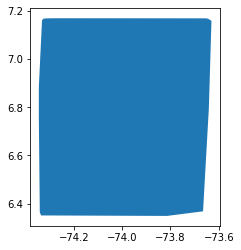

In [27]:
polygon  = convertir_gdf(get_discharges()).unary_union.convex_hull
grid = gpd.GeoDataFrame({'geometry':polygon}, index=[0])
grid.plot()

<AxesSubplot:>

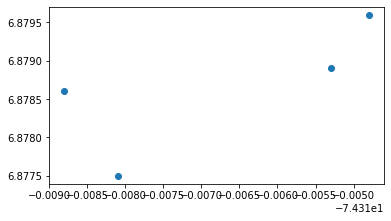

In [28]:
convertir_gdf(get_discharges()).iloc[65:69].plot()

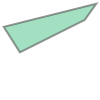

In [29]:
convertir_gdf(get_discharges()).iloc[65:69].unary_union.convex_hull

In [30]:
training_1 = pd.read_csv(r"C:\Users\Camilo\Proyectos\DS4A\project_ISA\features\training_set_line_1.csv")

In [31]:
training_2 = pd.read_csv(r"C:\Users\Camilo\Proyectos\DS4A\project_ISA\features\training_set_line_2.csv")

In [50]:
training_3 = pd.read_csv(r"C:\Users\Camilo\Proyectos\DS4A\project_ISA\features\training_set_line_3.csv", parse_dates=['date'])

In [62]:
outages_3.date =  pd.to_datetime(outages_3.date)

In [66]:
outage_selected = outages_3.date.iloc[10]

In [77]:
outage_selected
filtering_dates = ((training_3.date > (outage_selected - pd.offsets.DateOffset(hours=24))) & (training_3.date < outage_selected))
df_plot = training_3[filtering_dates]

In [85]:
outages_2.date.value_counts()>2

2014-10-21 01:30:00    False
2009-03-28 02:47:00    False
2012-03-31 22:04:00    False
2010-07-12 18:29:00    False
2015-08-08 02:10:00    False
                       ...  
2020-09-30 01:27:00    False
2009-06-16 20:48:00    False
2018-09-15 17:02:00    False
2009-11-23 02:14:00    False
2011-03-09 01:59:00    False
Name: date, Length: 136, dtype: bool

In [92]:
outages_2

,id_outages,code_occurrence,date,localize_range,long_line,dist_cerromatoso,dist_primavera,line
0,0,1062007,2007-11-03 03:45:00,15-20,245.21,45.0,0.0,2
1,2,4162007,2007-07-16 17:51:00,60-65,245.21,151.5,94.1,2
2,4,4812007,2007-08-08 01:28:00,15-20,245.21,38.0,207.6,2
3,5,4852007,2007-10-08 01:24:00,10-15,245.21,25.2,220.4,2
4,6,4952007,2007-08-15 04:04:00,30-35,245.21,77.1,168.5,2
...,...,...,...,...,...,...,...,...
132,156,4472020,2020-09-29 22:19:00,45-50,245.21,115.0,130.0,2
133,157,4482020,2020-09-30 01:27:00,40-45,245.21,100.1,145.0,2
134,158,4872020,2020-10-18 22:53:00,75-80,245.21,195.0,51.0,2
135,159,4882020,2020-10-18 23:52:00,70-75,245.21,178.3,66.9,2


In [104]:
outages_2.date.value_counts()>1


2014-10-21 01:30:00     True
2009-03-28 02:47:00    False
2012-03-31 22:04:00    False
2010-07-12 18:29:00    False
2015-08-08 02:10:00    False
                       ...  
2020-09-30 01:27:00    False
2009-06-16 20:48:00    False
2018-09-15 17:02:00    False
2009-11-23 02:14:00    False
2011-03-09 01:59:00    False
Name: date, Length: 136, dtype: bool

In [103]:
outages_2.loc[outages_2.date.isin(outages_2.date.value_counts()>1)]

,id_outages,code_occurrence,date,localize_range,long_line,dist_cerromatoso,dist_primavera,line


In [14]:
auxi = training_2[training_2['clusters']==1].pipe(convertir_gdf, crs='EPSG:4326').unary_union.convex_hull
poli = gpd.GeoDataFrame(geometry=[auxi], crs='EPSG:4326')
poli.to_crs('EPSG:3116').area

NameError: name 'convertir_gdf' is not defined

In [106]:
outages_2

,id_outages,code_occurrence,date,localize_range,long_line,dist_cerromatoso,dist_primavera,line
0,0,1062007,2007-11-03 03:45:00,15-20,245.21,45.0,0.0,2
1,2,4162007,2007-07-16 17:51:00,60-65,245.21,151.5,94.1,2
2,4,4812007,2007-08-08 01:28:00,15-20,245.21,38.0,207.6,2
3,5,4852007,2007-10-08 01:24:00,10-15,245.21,25.2,220.4,2
4,6,4952007,2007-08-15 04:04:00,30-35,245.21,77.1,168.5,2
...,...,...,...,...,...,...,...,...
132,156,4472020,2020-09-29 22:19:00,45-50,245.21,115.0,130.0,2
133,157,4482020,2020-09-30 01:27:00,40-45,245.21,100.1,145.0,2
134,158,4872020,2020-10-18 22:53:00,75-80,245.21,195.0,51.0,2
135,159,4882020,2020-10-18 23:52:00,70-75,245.21,178.3,66.9,2


In [15]:
training_1


,Unnamed: 0,time_delta,latitude,longitude,latitude_rad,longitude_rad,clusters,date,polarity,magnitude,current,line,x,y,lon_failure,lat_failure,dist_failure_km,label,outage
0,25231,314.445117,6.3488,-74.0845,0.110807,-1.293018,1.0,2018-04-24 21:32:33.293,-1,21.2,-21.2,1,9.992264e+05,1.193810e+06,-73.926639,6.670969,20.215674,0.0,1.0
1,25232,308.352117,6.3497,-74.0935,0.110823,-1.293176,1.0,2018-04-24 21:38:38.873,1,6.6,6.6,1,9.982306e+05,1.193910e+06,-73.926639,6.670969,21.082589,0.0,1.0
2,25233,307.670333,6.3533,-74.0912,0.110886,-1.293135,1.0,2018-04-24 21:39:19.780,-1,8.9,-8.9,1,9.984851e+05,1.194308e+06,-73.926639,6.670969,20.804264,0.0,1.0
3,25234,307.670050,6.3517,-74.0950,0.110858,-1.293202,1.0,2018-04-24 21:39:19.797,-1,5.6,-5.6,1,9.980647e+05,1.194131e+06,-73.926639,6.670969,21.201842,0.0,1.0
4,25235,307.002667,6.3553,-74.1246,0.110921,-1.293718,1.0,2018-04-24 21:39:59.840,1,7.2,7.2,1,9.947897e+05,1.194529e+06,-73.926639,6.670969,24.129911,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28186,246379,6.695383,6.7671,-73.7869,0.118108,-1.287824,51.0,2019-11-15 02:42:18.277,1,13.0,13.0,1,1.032127e+06,1.240079e+06,-73.825503,6.769000,4.308766,1.0,12.0
28187,246380,6.372500,7.0695,-73.6571,0.123386,-1.285559,51.0,2019-11-15 02:42:37.650,-1,8.5,-8.5,1,1.046447e+06,1.273533e+06,-73.825503,6.769000,21.011859,1.0,12.0
28188,246381,6.360883,7.0671,-73.7469,0.123344,-1.287126,51.0,2019-11-15 02:42:38.347,1,6.0,6.0,1,1.036526e+06,1.273260e+06,-73.825503,6.769000,12.780703,1.0,12.0
28189,246382,5.907333,7.0749,-73.6974,0.123480,-1.286262,51.0,2019-11-15 02:43:05.560,-1,6.7,-6.7,1,1.041994e+06,1.274126e+06,-73.825503,6.769000,17.194278,1.0,12.0


In [16]:
%%time
training_1.groupby(['clusters']).apply(lambda df:df.pipe(convertir_gdf).unary_union.convex_hull)

NameError: name 'convertir_gdf' is not defined

In [17]:
%%time
df_training =  training_1
for i in df_training.clusters.unique():
    auxi = df_training[df_training['clusters']==i].pipe(convertir_gdf).unary_union.convex_hull

NameError: name 'convertir_gdf' is not defined

In [18]:
areas_dict={}
df_training =  training_1
for i in df_training.clusters.unique():
    print(i)
    auxi = df_training[df_training['clusters']==i].pipe(convertir_gdf, crs='EPSG:4326').unary_union.convex_hull
    poli = gpd.GeoDataFrame(geometry=[auxi], crs='EPSG:4326')
    areas_dict[i] = poli.to_crs('EPSG:3116').area.iloc[0]
pd.DataFrame.from_dict(areas_dict, orient='index', columns=['Area_metros']).to_excel('training_areas_1.xlsx')

1.0


NameError: name 'convertir_gdf' is not defined

In [19]:
from matplotlib_scalebar.scalebar import ScaleBar

In [85]:
poli.centroid.distance(towers_projected.unary_union).iloc[0]

138760.6035230156

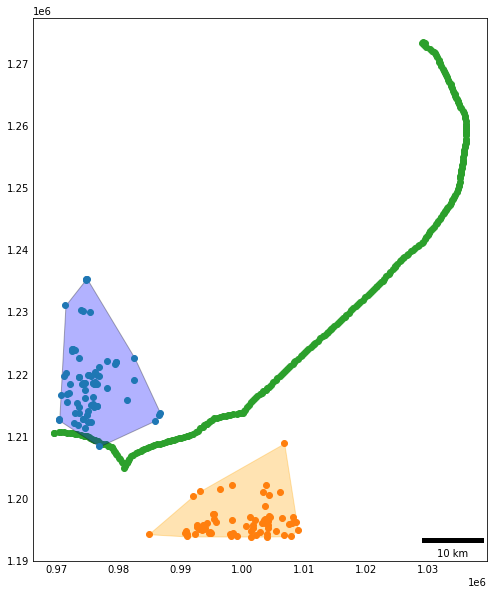

In [44]:
fig,ax = plt.subplots(figsize=(10,10))
cluster_id = 12
df_training =  training_1
df_towers = towers_1
auxi = df_training[df_training['clusters']==cluster_id].pipe(convertir_gdf, crs='EPSG:4326').unary_union.convex_hull
poli = gpd.GeoDataFrame(geometry=[auxi], crs='EPSG:4326').to_crs('EPSG:3116')
poli.plot(ax=ax, color='blue', edgecolor='k', alpha=0.3)
df_training[df_training['clusters']==cluster_id].pipe(convertir_gdf, crs='EPSG:4326').to_crs('EPSG:3116').plot(ax=ax)

cluter2 =1
auxi = df_training[df_training['clusters']==cluter2].pipe(convertir_gdf, crs='EPSG:4326').unary_union.convex_hull
poli = gpd.GeoDataFrame(geometry=[auxi], crs='EPSG:4326').to_crs('EPSG:3116')
poli.plot(ax=ax, color='orange', edgecolor='orange', alpha=0.3)
df_training[df_training['clusters']==cluter2].pipe(convertir_gdf, crs='EPSG:4326').to_crs('EPSG:3116').plot(ax=ax)

towers_projected = df_towers.pipe(convertir_gdf).to_crs('EPSG:3116')
towers_projected.plot(ax=ax, zorder=-10)

# Visualizacion
ax.add_artist(ScaleBar(1,frameon=False, scale_loc='bottom', label_loc='top',location='lower right'))
# buf_dist=0
# xlim = ([poli.buffer(buf_dist).total_bounds[0],  poli.buffer(buf_dist).total_bounds[2]])
# ylim = ([poli.buffer(buf_dist).total_bounds[1],  poli.buffer(buf_dist).total_bounds[3]])
ax.tick_params(size=0)
# ax.set_xlim(xlim)
# ax.set_ylim(ylim)
fig.savefig('clusters_dsitancias.png', dpi=400)

<AxesSubplot:>

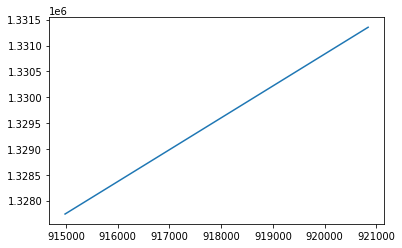

In [144]:
poli.plot()

In [21]:
df_training =  training_1
df_towers = towers_1
#distancias de puntos
for i,(df_towers,df_training) in enumerate(zip([towers_1,towers_2,towers_3], [training_1, training_2, training_3])):
    distancias_dict={}
    for cluster_id in df_training.clusters.unique():
        print(cluster_id)
        auxi = df_training[df_training['clusters']==cluster_id].pipe(convertir_gdf, crs='EPSG:4326').to_crs('EPSG:3116')
        towers_projected = df_towers.pipe(convertir_gdf).to_crs('EPSG:3116')
        distancia = auxi.distance(towers_projected.unary_union).min()
        distancias_dict[cluster_id] = distancia
    pd.DataFrame.from_dict(distancias_dict, orient='index', columns=['dist_puntos_min']).to_excel(f'training_dist_puntos_min_{i+1}.xlsx')
        

1.0
2.0
3.0
4.0
5.0


KeyboardInterrupt: 

In [92]:
#distancia maxima de los puntos
for i,(df_towers,df_training) in enumerate(zip([towers_1,towers_2,towers_3], [training_1, training_2, training_3])):
    if i==0:
        distancias_dict={}
        for cluster_id in df_training.clusters.unique():
            print(cluster_id)
            auxi = df_training[df_training['clusters']==cluster_id].pipe(convertir_gdf, crs='EPSG:4326').to_crs('EPSG:3116')
            towers_projected = df_towers.pipe(convertir_gdf).to_crs('EPSG:3116')
            distancia = auxi.distance(towers_projected.unary_union).max()
            distancias_dict[cluster_id] = distancia
        pd.DataFrame.from_dict(distancias_dict, orient='index', columns=['dist_puntos_max']).to_excel(f'training_dist_puntos_max_{i+1}.xlsx')
        

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
42.0
41.0
43.0
44.0
45.0
46.0
47.0
48.0
50.0
49.0
51.0
52.0


In [73]:
paths

[WindowsPath('features_2.xlsx'),
 WindowsPath('training_areas_2.xlsx'),
 WindowsPath('training_dist_puntos_max_2.xlsx'),
 WindowsPath('training_dist_puntos_min_2.xlsx')]

In [72]:
i=2
paths = list(Path('./').glob(f'*_{i}.xlsx'))
df_concatenado = pd.concat([pd.read_excel(path, index_col=0) for path in paths], axis=1,)
df_concatenado

,Area_metros,dist_puntos_max,dist_puntos_min,Area_metros.1,dist_puntos_max.1,dist_puntos_min.1,Area_metros,dist_puntos_max,dist_puntos_min
1,4.148350e+08,29648.126933,14699.911161,4.148350e+08,29648.126933,14699.911161,4.148350e+08,29648.126933,14699.911161
2,1.767924e+08,22551.723267,263.423847,1.767924e+08,22551.723267,263.423847,1.767924e+08,22551.723267,263.423847
3,4.410064e+08,17226.711943,203.507807,4.410064e+08,17226.711943,203.507807,4.410064e+08,17226.711943,203.507807
4,5.664517e+07,29672.095650,22475.369334,5.664517e+07,29672.095650,22475.369334,5.664517e+07,29672.095650,22475.369334
5,4.241427e+07,23313.661399,9714.889682,4.241427e+07,23313.661399,9714.889682,4.241427e+07,23313.661399,9714.889682
...,...,...,...,...,...,...,...,...,...
1150,2.486456e+07,17045.703448,9235.011187,2.486456e+07,17045.703448,9235.011187,2.486456e+07,17045.703448,9235.011187
1151,3.170265e+06,13393.724060,10552.181418,3.170265e+06,13393.724060,10552.181418,3.170265e+06,13393.724060,10552.181418
1152,3.715355e+08,29951.468048,10621.194821,3.715355e+08,29951.468048,10621.194821,3.715355e+08,29951.468048,10621.194821
1153,1.214920e+07,29750.693648,21249.115337,1.214920e+07,29750.693648,21249.115337,1.214920e+07,29750.693648,21249.115337


In [93]:
from pathlib import Path

for i in range(1,4):
    paths = list(Path('./').glob(f'*_{i}.xlsx'))
    df_concatenado = pd.concat([pd.read_excel(path, index_col=0) for path in paths], axis=1,)
    df_concatenado.to_excel(f'features_{i}.xlsx')

In [89]:
for i,(df_towers,df_training) in enumerate(zip([towers_1,towers_2,towers_3], [training_1, training_2, training_3])):
    distancias_dict={}
    for cluster_id in df_training.clusters.unique():
        print(cluster_id)
        auxi = df_training[df_training['clusters']==cluster_id].pipe(convertir_gdf, crs='EPSG:4326').unary_union.convex_hull
        towers_projected = df_towers.pipe(convertir_gdf).to_crs('EPSG:3116')
        poli = gpd.GeoDataFrame(geometry=[auxi], crs='EPSG:4326').to_crs('EPSG:3116')
        distancia = poli.distance(towers_projected.unary_union).iloc[0]
        print(distancia)
        distancias_dict[cluster_id] = distancia
    pd.DataFrame.from_dict(distancias_dict, orient='index', columns=['dist_poligono']).to_excel(f'training_dist_poligono_{i+1}.xlsx')

.03758729267
795
7752.037299477104
796
0.0
797
4573.965072694263
798
6477.833108113204
799
2750.0238964371692
800
5795.28056155782
801
0.0
802
18800.871307120353
803
12328.96370049851
804
20416.53987550323
805
1611.4850665364013
806
15076.345351437332
807
2327.1095446874733
808
27217.503184193545
809
4844.754950836944
810
0.0
811
3983.016565346174
812
0.0
813
14145.187179732113
814
0.0
815
0.0
816
790.9966705390723
817
18549.84352416161
819
0.0
818
17657.605513661383
820
1129.1970192302322
821
0.0
822
16781.24382416673
823
0.0
824
18467.796897211654
825
23795.357305179725
826
26170.3822615294
827
26350.832481152975
828
4112.172112410922
829
883.0898175523271
830
2195.828046989826
831
18374.000316870588
832
8133.4643422852005
833
0.0
834
6557.926151646433
835
23915.396130152196
836
27534.509681649004
837
13727.752129477403
838
0.0
839
22384.10309683886
840
3514.4454679509413
841
0.0
842
0.0
843
0.0
844
0.0
845
8746.641550924862
846
5448.0478553456405
847
21582.038171874305
848
25944.065

In [90]:
for i,(df_towers,df_training) in enumerate(zip([towers_1,towers_2,towers_3], [training_1, training_2, training_3])):
    distancias_dict={}
    for cluster_id in df_training.clusters.unique():
        print(cluster_id)
        auxi = df_training[df_training['clusters']==cluster_id].pipe(convertir_gdf, crs='EPSG:4326').unary_union.convex_hull
        towers_projected = df_towers.pipe(convertir_gdf).to_crs('EPSG:3116')
        poli = gpd.GeoDataFrame(geometry=[auxi], crs='EPSG:4326').to_crs('EPSG:3116')
        distancia =poli.centroid.distance(towers_projected.unary_union).iloc[0]
        print(distancia)
        distancias_dict[cluster_id] = distancia
    pd.DataFrame.from_dict(distancias_dict, orient='index', columns=['dist_centro']).to_excel(f'training_dist_centro_{i+1}.xlsx')



12452.961188956562
962
3037.3574333046076
963
13802.213012929942
964
1772.3267174560003
965
20638.052063604155
966
4541.259346635973
967
4876.66956661024
968
15478.11969905393
969
19943.030821810746
970
25608.73751248521
972
25375.989523286982
971
7181.3666836069015
973
12083.822038406866
974
24468.649513415643
975
22986.348885407984
976
16722.775290842605
977
7703.184718818145
978
11346.50028663089
979
18207.935937864444
980
25605.443391243396
981
14288.204670500842
983
4808.344120965318
982
20371.58462869529
984
22348.548406065318
985
16316.757369107605
986
14764.901675038773
987
27089.05216403081
988
1626.2972393703276
989
23583.686516391408
990
24430.791774078298
991
2942.553135530092
992
10875.767541706731
993
22807.351825866892
994
20925.96573627288
996
22832.74251648134
995
23593.397009786928
997
26817.254507625203
998
2764.4131492667875
999
27478.09337560074
1000
4579.633782065733
1001
22504.710891990173
1002
13240.432627628239
1003
21573.844966169483
1004
22855.76038360839
10

In [20]:
puntos = df_training[df_training['clusters']==i].pipe(convertir_gdf, crs='EPSG:4326').unary_union
gpd.GeoDataFrame(geometry=[puntos], crs='EPSG:4326').to_crs('EPSG:3116')

,geometry
0,"MULTIPOINT (1001901.507 1262685.282, 1003415.4..."


In [45]:
list(poli.geometry.boundary.iloc[0].coords)

[(1012323.0904698867, 1257389.4069958488),
 (1001801.8424075965, 1268834.1255275486),
 (999724.6752659233, 1273069.7296901536),
 (1001039.2237412538, 1280977.0137206144),
 (1005346.946895461, 1284040.6689345578),
 (1024533.5926561112, 1283272.1715736776),
 (1026864.9997038031, 1281890.9450774824),
 (1028537.0034107924, 1274670.1695198726),
 (1029811.0365190535, 1268544.0826757948),
 (1029844.3622057969, 1268234.443958579),
 (1025780.2699087696, 1264239.9005980636),
 (1012323.0904698867, 1257389.4069958488)]

In [9]:
import sys
sys.path.append(r'C:\Users\Camilo\Proyectos\DS4A\project_ISA\EquipoRayo')

In [79]:
training_1.columns

Index(['Unnamed: 0', 'time_delta', 'latitude', 'longitude', 'latitude_rad',
       'longitude_rad', 'clusters', 'date', 'polarity', 'magnitude', 'current',
       'line', 'x', 'y', 'lon_failure', 'lat_failure', 'dist_failure_km',
       'label', 'outage'],
      dtype='object')

In [41]:
from distancias import FeaturesDistancia

fDist = FeaturesDistancia(training_1[:10000], towers_1)

features = [fDist.areas(), fDist.distancias_maximas(), fDist.distancias_poligono(), fDist.distancias_centroide()]
pd.concat(features, axis=1)

,Area_metros,dist_puntos_max,dist_poligono,dist_centro
1.0,1.997038e+08,21356.863136,7608.621318,13568.459873
2.0,1.792071e+08,19436.939021,5149.274137,12087.680478
3.0,4.779754e+09,29990.302003,0.000000,3022.396695
4.0,8.412046e+06,24060.486308,11035.588186,18827.233924
5.0,5.797066e+08,29276.049974,170.764120,14263.509363
6.0,8.779968e+07,29981.450455,21392.935990,25979.478880
7.0,3.993124e+07,20061.560529,11686.820255,16369.610909
8.0,1.623815e+09,29977.985474,0.000000,14509.036074
9.0,1.487354e+09,29889.774217,0.000000,7242.488288
10.0,2.374629e+07,21941.828702,12468.829153,17945.444313


,Area_metros,dist_puntos_max,dist_poligono,dist_centro
1.0,1.997038e+08,21356.863136,7608.621318,13568.459873
2.0,1.792071e+08,19436.939021,5149.274137,12087.680478
3.0,1.525921e+09,29896.831363,0.000000,10268.176362


In [ ]:
,